# Part 5 - our prediction

# in this part, we wanted to see if we can predict the place of each one of the hotels on booking websites and see if we can predict which hotel will be the first hotel based on the data we gathered



In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared
from sklearn.linear_model import LogisticRegression
import datetime as dt
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [368]:
booking_df = pd.read_csv('/Users/danielshani/Library/CloudStorage/OneDrive-TheCollegeofManagementAcademicStudies/ה- לימודים/שנה ב/סמסטר א/מבוא למדעי הנתונים/Summery_work/B. phase 1_2_3/booking_properties_cleaned_2.csv')

In [369]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68681 entries, 0 to 68680
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   element                     68681 non-null  object 
 1   url                         68681 non-null  object 
 2   check_in                    68681 non-null  object 
 3   check_out                   68681 non-null  object 
 4   length_of_stay              68681 non-null  int64  
 5   time_to_travel              68681 non-null  int64  
 6   name                        68681 non-null  object 
 7   review_score                68681 non-null  float64
 8   review_count                68681 non-null  float64
 9   review_summery              68681 non-null  float64
 10  price                       68681 non-null  float64
 11  address                     68681 non-null  object 
 12  location_score              68681 non-null  float64
 13  is_sustainable              686

In [370]:
booking_df['check_in'] = pd.to_datetime(booking_df['check_in'])
booking_df['check_out'] = pd.to_datetime(booking_df['check_out'])

In [371]:
booking_df.drop(['url','element','check_in','check_out','name','address','recommended_unit'],axis=1,inplace=True)

In [372]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68681 entries, 0 to 68680
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_of_stay              68681 non-null  int64  
 1   time_to_travel              68681 non-null  int64  
 2   review_score                68681 non-null  float64
 3   review_count                68681 non-null  float64
 4   review_summery              68681 non-null  float64
 5   price                       68681 non-null  float64
 6   location_score              68681 non-null  float64
 7   is_sustainable              68681 non-null  int64  
 8   rating_stars                68681 non-null  float64
 9   free_cancelation            68681 non-null  int64  
 10  is_breakfast_included       68681 non-null  int64  
 11  room_name_type              68681 non-null  int64  
 12  bed_room_type               68681 non-null  int64  
 13  preferred_badge             686

In [373]:
x = booking_df.drop(['place_in_page'],axis=1)
y = booking_df['place_in_page']

In [374]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# we used tpot to help us run on all the regression that is commonly used that can help us predict what is more important to predict the place in the website


In [9]:
from tpot import TPOTRegressor

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [10]:
tpot = TPOTRegressor(generations=5, population_size=100,verbosity = 2)
tpot.fit(x_train,y_train)
print(tpot.fitted_pipeline_)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -861.9460214441735

Generation 2 - Current best internal CV score: -844.8085867285238

Generation 3 - Current best internal CV score: -844.3845174734863

Generation 4 - Current best internal CV score: -838.5408880593511

Generation 5 - Current best internal CV score: -838.5408880593511

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.55, min_samples_leaf=4, min_samples_split=12, n_estimators=100)
Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max_features=0.55,
                                       min_samples_leaf=4,
                                       min_samples_split=12))])


## we got that the best thing we can do is run random forest with there hyperparameters

In [42]:
rf_model = RandomForestRegressor( bootstrap=False, max_features=0.55, min_samples_leaf=4, min_samples_split=12, n_estimators=200)
rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_features=0.55, min_samples_leaf=4,
                      min_samples_split=12, n_estimators=200)

In [43]:
rf_model.score(x_test,y_test)

0.6598982998515517

In [44]:
y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)

resid = y_test - y_pred_test
print(resid.mean())

0.34606271603778693


In [45]:
importances = rf_model.feature_importances_
importances

array([0.0150529 , 0.13167996, 0.10084903, 0.23858119, 0.01907756,
       0.05569334, 0.04211906, 0.01652504, 0.03062405, 0.03795378,
       0.01542528, 0.00437951, 0.02499098, 0.01590883, 0.00663694,
       0.13144867, 0.11305388])

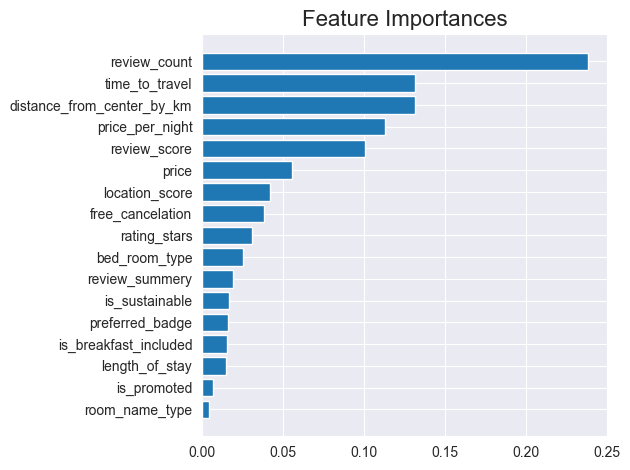

In [46]:
indices = np.argsort(importances)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])
plt.title("Feature Importances", fontsize=16)
plt.tight_layout()
plt.show()

## we can see that those are the percent that each one of them affects on the place of the hotel on the website

In [97]:
importances

array([0.0150529 , 0.13167996, 0.10084903, 0.23858119, 0.01907756,
       0.05569334, 0.04211906, 0.01652504, 0.03062405, 0.03795378,
       0.01542528, 0.00437951, 0.02499098, 0.01590883, 0.00663694,
       0.13144867, 0.11305388])

In [375]:
place_in_page = booking_df['place_in_page']
length_of_stay = booking_df['length_of_stay']
time_to_travel = booking_df['time_to_travel']
scaled_df = booking_df.drop(['place_in_page','length_of_stay','time_to_travel'],axis=1).apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))
scaled_df = scaled_df.dropna(0)
scaled_df['place_in_page'] = place_in_page
scaled_df['length_of_stay'] = length_of_stay
scaled_df['time_to_travel'] = time_to_travel

In [376]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
review_score,68681.0,0.203144,0.059269,0.0,0.17,0.20,0.24,1.0
review_count,68681.0,0.858538,0.158987,0.0,0.83,0.91,0.95,1.0
review_summery,68681.0,0.667684,0.159091,0.0,0.60,0.60,0.80,1.0
price,68681.0,0.659726,0.208187,0.0,0.51,0.68,0.84,1.0
location_score,68681.0,0.585291,0.473092,0.0,0.05,1.00,1.00,1.0
is_sustainable,68681.0,0.388899,0.487504,0.0,0.00,0.00,1.00,1.0
rating_stars,68681.0,0.235337,0.132568,0.0,0.20,0.20,0.20,1.0
free_cancelation,68681.0,0.412880,0.492355,0.0,0.00,0.00,1.00,1.0
is_breakfast_included,68681.0,0.779546,0.414556,0.0,1.00,1.00,1.00,1.0
room_name_type,68681.0,0.953626,0.210295,0.0,1.00,1.00,1.00,1.0


In [377]:
for col, importance in zip(scaled_df.drop(['place_in_page','time_to_travel','length_of_stay'],axis=1).columns, importances[indices]):
    scaled_df[col].astype(float)
    scaled_df[col] = scaled_df[col]*importance

In [378]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
review_score,68681.0,0.000890,0.000260,0.0,0.000745,0.000876,0.001051,0.004380
review_count,68681.0,0.005698,0.001055,0.0,0.005509,0.006040,0.006305,0.006637
review_summery,68681.0,0.010051,0.002395,0.0,0.009032,0.009032,0.012042,0.015053
price,68681.0,0.010176,0.003211,0.0,0.007867,0.010489,0.012957,0.015425
location_score,68681.0,0.009311,0.007526,0.0,0.000795,0.015909,0.015909,0.015909
is_sustainable,68681.0,0.006427,0.008056,0.0,0.000000,0.000000,0.016525,0.016525
rating_stars,68681.0,0.004490,0.002529,0.0,0.003816,0.003816,0.003816,0.019078
free_cancelation,68681.0,0.010318,0.012304,0.0,0.000000,0.000000,0.024991,0.024991
is_breakfast_included,68681.0,0.023873,0.012695,0.0,0.030624,0.030624,0.030624,0.030624
room_name_type,68681.0,0.036194,0.007981,0.0,0.037954,0.037954,0.037954,0.037954


In [379]:
scaled_df

,review_score,review_count,review_summery,price,location_score,is_sustainable,rating_stars,free_cancelation,is_breakfast_included,room_name_type,bed_room_type,preferred_badge,is_promoted,distance_from_center_by_km,price_per_night,place_in_page,length_of_stay,time_to_travel
0,0.000920,0.006305,0.012042,0.015271,0.015909,0.000000,0.003816,0.024991,0.030624,0.037954,0.005054,0.055693,0.000000,0.048613,0.119618,1,1,1
1,0.000526,0.006040,0.006021,0.014808,0.000795,0.000000,0.003816,0.024991,0.030624,0.037954,0.010530,0.000000,0.100849,0.096096,0.103844,2,1,1
2,0.000701,0.006172,0.009032,0.014808,0.000795,0.000000,0.007631,0.024991,0.030624,0.037954,0.021060,0.000000,0.100849,0.091574,0.103844,3,1,1
3,0.000788,0.006106,0.009032,0.014500,0.015909,0.000000,0.003816,0.024991,0.030624,0.037954,0.016005,0.000000,0.000000,0.090443,0.086756,4,1,1
4,0.000569,0.006438,0.006021,0.014191,0.000477,0.016525,0.003816,0.024991,0.030624,0.037954,0.005054,0.000000,0.100849,0.100618,0.070982,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68676,0.001139,0.006438,0.012042,0.006170,0.015909,0.000000,0.007631,0.000000,0.000000,0.037954,0.005054,0.055693,0.100849,0.091574,0.064410,145,5,30
68677,0.000701,0.005907,0.009032,0.001234,0.000318,0.000000,0.000000,0.024991,0.030624,0.037954,0.005054,0.055693,0.000000,0.106271,0.021032,147,5,30
68678,0.000832,0.005575,0.009032,0.003394,0.015909,0.016525,0.003816,0.024991,0.030624,0.037954,0.010530,0.000000,0.000000,0.085921,0.039435,148,5,30
68679,0.000569,0.006305,0.006021,0.003394,0.000636,0.000000,0.003816,0.024991,0.030624,0.037954,0.021060,0.055693,0.000000,0.092704,0.039435,149,5,30


In [380]:
def segment_dataframe(df, column):
    segments = []
    start = 0
    for i in range(1, len(df)):
        if df[column][i] < df[column][i-1]:
            segments.append(df[start:i])
            start = i
    segments.append(df[start:])
    return segments
s = segment_dataframe(scaled_df,"place_in_page")
print(s)

[     review_score  review_count  review_summery     price  location_score  \
0        0.000920      0.006305        0.012042  0.015271        0.015909   
1        0.000526      0.006040        0.006021  0.014808        0.000795   
2        0.000701      0.006172        0.009032  0.014808        0.000795   
3        0.000788      0.006106        0.009032  0.014500        0.015909   
4        0.000569      0.006438        0.006021  0.014191        0.000477   
..            ...           ...             ...       ...             ...   
192      0.001007      0.005376        0.012042  0.014963        0.000955   
193      0.000832      0.006371        0.009032  0.014346        0.015909   
194      0.000701      0.006438        0.009032  0.014500        0.000955   
195      0.000482      0.006571        0.006021  0.014500        0.000318   
196      0.000788      0.006239        0.009032  0.014500        0.015909   

     is_sustainable  rating_stars  free_cancelation  is_breakfast_included

In [381]:
for table in s:
    table.reset_index(inplace = True)

In [382]:
s[3]

,index,review_score,review_count,review_summery,price,location_score,is_sustainable,rating_stars,free_cancelation,is_breakfast_included,room_name_type,bed_room_type,preferred_badge,is_promoted,distance_from_center_by_km,price_per_night,place_in_page,length_of_stay,time_to_travel
0,555,0.000920,0.006305,0.012042,0.012340,0.015909,0.000000,0.003816,0.024991,0.030624,0.037954,0.021060,0.055693,0.000000,0.048613,0.110417,1,4,1
1,556,0.000526,0.006040,0.006021,0.010798,0.000795,0.000000,0.003816,0.024991,0.030624,0.037954,0.010530,0.000000,0.100849,0.096096,0.094643,2,4,1
2,557,0.001007,0.005708,0.012042,0.012032,0.000477,0.016525,0.019078,0.000000,0.030624,0.037954,0.005054,0.000000,0.100849,0.090443,0.107788,3,4,1
3,558,0.000832,0.001128,0.009032,0.012957,0.000955,0.000000,0.003816,0.024991,0.030624,0.037954,0.016005,0.000000,0.100849,0.097226,0.118304,4,4,1
4,559,0.000963,0.006637,0.012042,0.010489,0.000795,0.016525,0.003816,0.000000,0.030624,0.037954,0.005054,0.000000,0.100849,0.089313,0.092014,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,759,0.000657,0.006371,0.009032,0.007096,0.015909,0.000000,0.003816,0.024991,0.030624,0.000000,0.005054,0.000000,0.000000,0.091574,0.052579,206,4,1
205,760,0.000876,0.006504,0.009032,0.005553,0.015909,0.000000,0.003816,0.024991,0.030624,0.037954,0.005054,0.000000,0.100849,0.094965,0.035491,207,4,1
206,761,0.000569,0.006438,0.006021,0.006324,0.000477,0.016525,0.003816,0.024991,0.030624,0.037954,0.005054,0.000000,0.100849,0.100618,0.044693,208,4,1
207,762,0.001270,0.006504,0.012042,0.011877,0.015909,0.016525,0.007631,0.024991,0.030624,0.037954,0.021060,0.055693,0.100849,0.099487,0.106473,209,4,1


In [383]:
featrues = ['review_count','distance_from_center_by_km','review_score','price',"location_score", "free_cancelation"]
def compare_hotels(hotel1, hotel2):
    if hotel1['review_count'] > hotel2['review_count']:
        return True
    elif hotel1['distance_from_center_by_km'] > hotel2['distance_from_center_by_km']:
        return True
    elif hotel1['review_score'] > hotel2['review_score']:
        return True
    elif hotel1['price'] > hotel2['price']:
        return True
    elif hotel1['location_score'] > hotel2['location_score']:
        return True
    elif hotel1['free_cancelation'] > hotel2['free_cancelation']:
        return True
    elif hotel1['rating_stars'] > hotel2['rating_stars']:
        return True
    else:
        return False

In [384]:
def bubble_sort(dfs):
    dfs['new_place'] = 0
    count = 0
    r = len(dfs)
    for i in range(r):
        for j in range(0, r-i-1):
            if compare_hotels(dfs.iloc[i], dfs.iloc[j]):
                dfs.iloc[j], dfs.iloc[j+1] = dfs.iloc[j+1], dfs.iloc[j]
    dfs['new_place'] = dfs.index + 1
    return dfs

In [385]:
index = 1
mean_arr = []
rmse_arr = []
std_arr = []
print('******Start******')
for table in s:
    tmp_table = bubble_sort(table)
    tmp_table['distace_between_places'] = tmp_table['place_in_page'] - tmp_table['new_place']
    mean = tmp_table['distace_between_places'].mean()
    rmse = np.sqrt((table['distace_between_places']**2).mean())
    std = tmp_table['distace_between_places'].std()
    mean_arr.append(mean)
    rmse_arr.append(rmse)
    std_arr.append(std)
    print(f'for table in index -> {index}')
    print(f'mean -> {mean}')
    print(f'rmse -> {rmse}')
    print(f'std -> {std}')
    print('******************************')
    index = index + 1

print('******End******')

******Start******
for table in index -> 1
mean -> 3.9137055837563453
rmse -> 95.55966589619752
std -> 95.72274837308292
******************************
for table in index -> 2
mean -> 0.20134228187919462
rmse -> 70.43689164562834
std -> 70.67416476870224
******************************
for table in index -> 3
mean -> 0.0861244019138756
rmse -> 98.52389018811145
std -> 98.76040475274876
******************************
for table in index -> 4
mean -> 0.3349282296650718
rmse -> 98.71582141242196
std -> 98.95226498320957
******************************
for table in index -> 5
mean -> 2.325
rmse -> 96.24123336699296
std -> 96.45458417848903
******************************
for table in index -> 6
mean -> 3.860606060606061
rmse -> 81.43549222506974
std -> 81.59155391559936
******************************
for table in index -> 7
mean -> 0.0
rmse -> 70.47827088306485
std -> 70.71437965458571
******************************
for table in index -> 8
mean -> 7.201219512195122
rmse -> 81.30321896846488
std

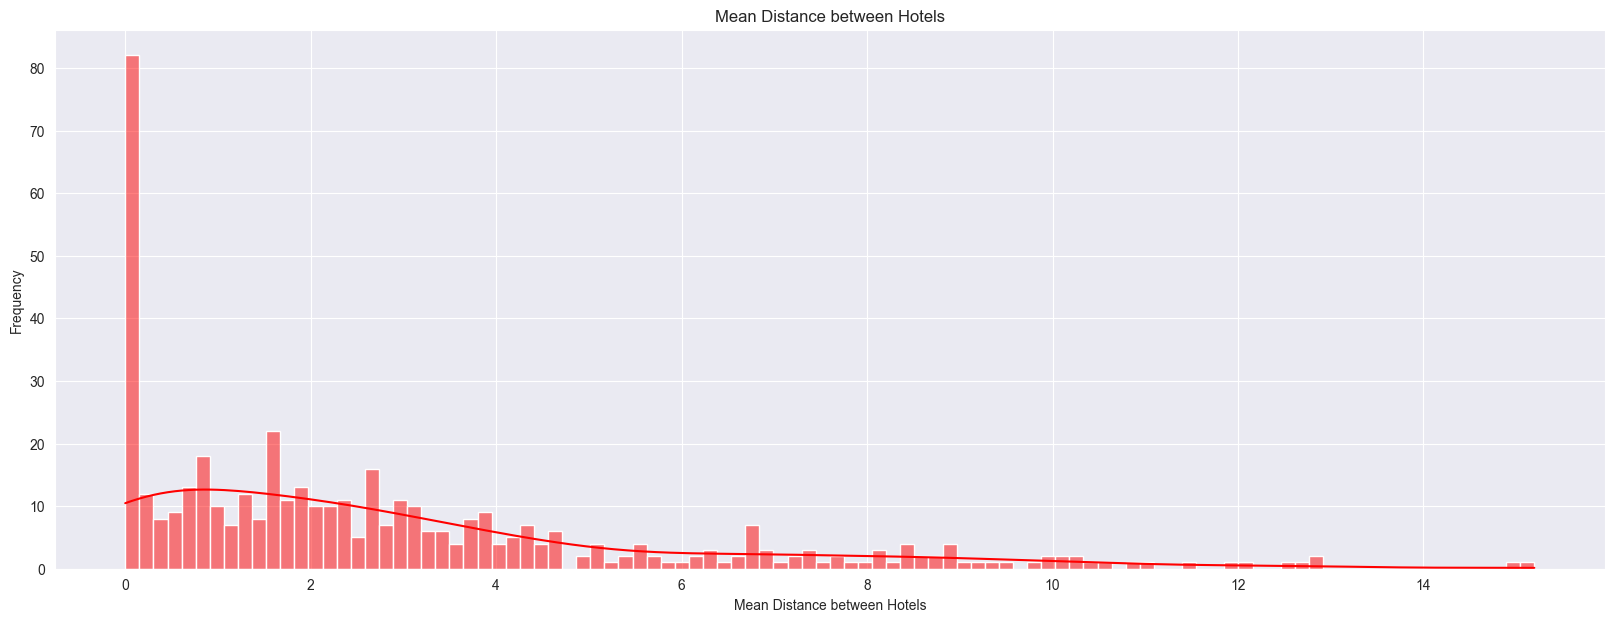

In [392]:
plt.figure(figsize=(20,7))
sns.histplot(mean_arr,bins=100,kde=True,color = 'red')
plt.xlabel('Mean Distance between Hotels')
plt.ylabel('Frequency')
plt.title('Mean Distance between Hotels')
plt.show()

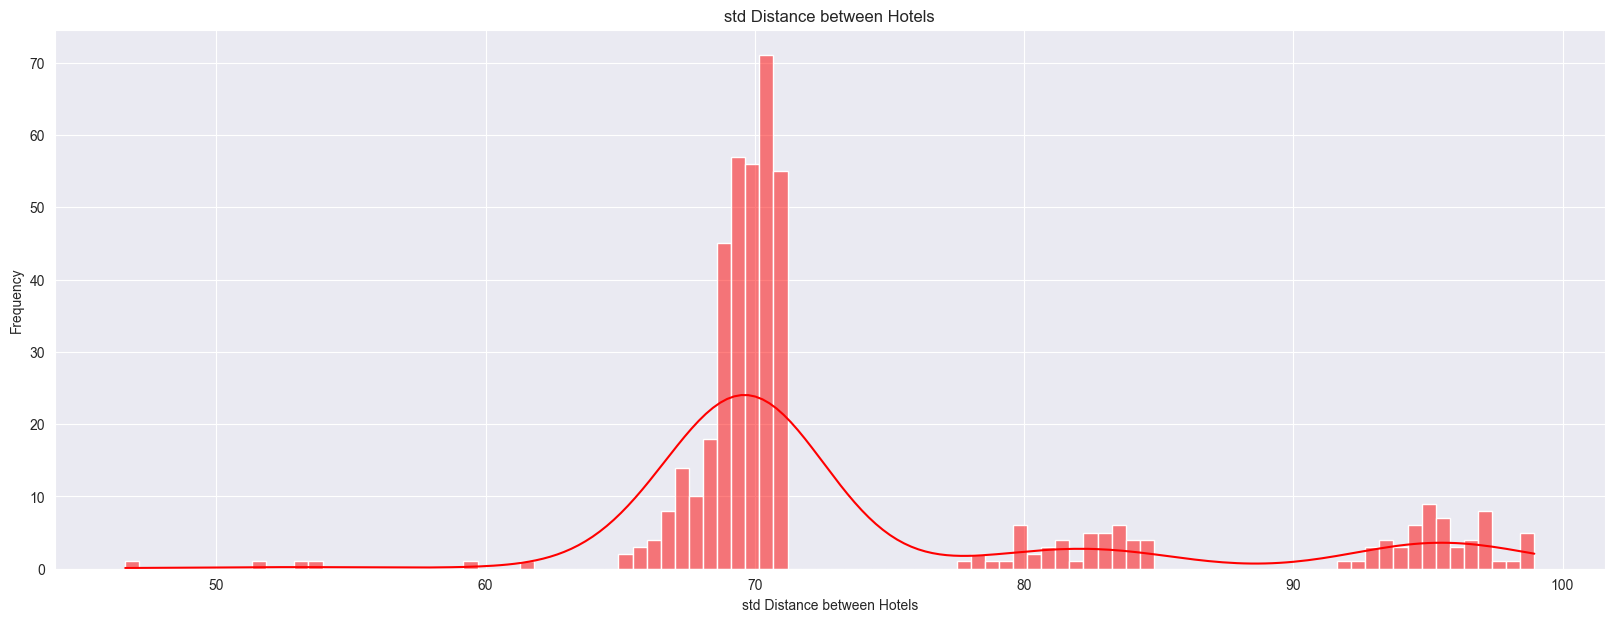

In [395]:
plt.figure(figsize=(20,7))
sns.histplot(std_arr,bins=100,kde=True,color = 'red')
plt.xlabel('std Distance between Hotels')
plt.ylabel('Frequency')
plt.title('std Distance between Hotels')
plt.show()

### we can see that we predictend most of the hotel place in the website by very low distance and we got some pretty good mse and std on each one of them